In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [26]:
#https://www.kaggle.com/datasets/amartyanambiar/gold-silver-prices-1791-2020

datos = pd.read_csv("goldsilver_1791-2021.csv")

datos.info()
datos.head()
datos.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      230 non-null    int64  
 1   Gold Price                230 non-null    float64
 2   Silver Price              230 non-null    float64
 3   Gold/Silver Price Ratio   230 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 7.3 KB


,Year,Gold Price,Silver Price,Gold/Silver Price Ratio
225,2016,1252.0,17.16,72.96
226,2017,1260.0,17.08,73.76
227,2018,1270.0,15.72,80.77
228,2019,1390.0,16.17,85.92
229,2020,1770.0,20.54,86.14


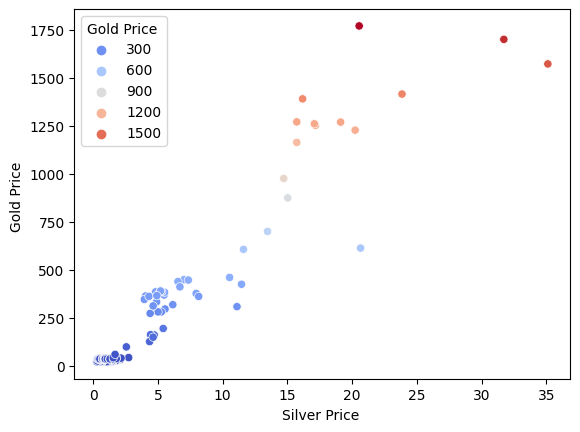

In [5]:
sns.scatterplot(x="Silver Price ", y="Gold Price ",data=datos,hue="Gold Price ",palette="coolwarm")
plt.show()

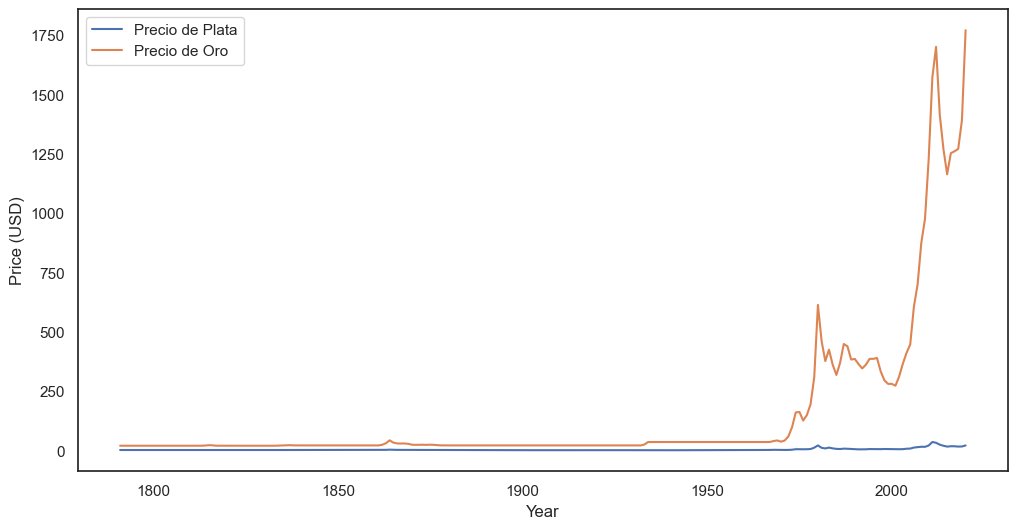

In [24]:
sns.set(style="white")  # Establecer el estilo del gráfico

plt.figure(figsize=(12, 6))  # Definir el tamaño del gráfico

# Gráfico de líneas para el precio de la plata
sns.lineplot(data=datos, x="Year", y="Silver Price ", label="Precio de Plata")

# Agregar otra línea para el precio del oro
sns.lineplot(data=datos, x="Year", y="Gold Price ", label="Precio de Oro")

plt.xlabel("Year")
plt.ylabel("Price (USD)")

# Mostrar una leyenda
plt.legend()

plt.show()

In [6]:
X = datos["Silver Price "]
Y = datos["Gold Price "]

X_procesada = X.values.reshape(-1,1)
Y_procesada = Y.values.reshape(-1,1)

In [7]:
modelo = LinearRegression()

modelo.fit(X_procesada,Y_procesada)

LinearRegression()

In [34]:
precioPlata2023 = 24.18

prediccion = modelo.predict([[precioPlata2023]])

print("Precio Oro 2023: $",round(prediccion[0][0]))
#1,949.30

precioPlata2020 = 20.54

prediccion = modelo.predict([[precioPlata2020]])

print("Precio Oro 2020: $",round(prediccion[0][0]))
#1770.0

precioPlata1963 = 1.28

prediccion = modelo.predict([[precioPlata1963]])

print("Precio Oro 1963: $",round(prediccion[0][0]))
#35

Precio Oro 2023: $ 1418
Precio Oro 2020: $ 1200
Precio Oro 1963: $ 44


In [14]:
coeficiente = modelo.score(X_procesada,Y_procesada)

por_coeficiente = coeficiente * 100

print("Coeficiente de determinación :", round(por_coeficiente, 2), "%")

Coeficiente de determinación : 91.19 %
